In [1]:
import pandas as pd
import numpy as np

# Relative file path should be same for everybody, but maybe Mac OSX might not work here
# BTW, you need to extract data in zip files from Teams to the `data` directory.
file_path = "./../Data/Old_Data_Safe_Here/Dataset_1/Combined_Data_1/combined_training.csv"

# Read the CSV file into a DataFrame
male_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(male_data)
features =male_data.drop(['0', 'PPT ID', 'Site','Age','Gender','Race','ALM','% fat - Total', 'BMD - Total'], axis=1)

       0                                    PPT ID  Site  Age  Gender  \
0      2  02ADL0179_A December 1 2017 09_24.binary   2.0   33  Female   
1      3  02ADL0180_A December 1 2017 11_06.binary   2.0   65    Male   
2      4  02ADL0181_A December 4 2017 11_59.binary   2.0   45  Female   
3      5  02ADL0182_A December 6 2017 08_35.binary   2.0   22  Female   
4      6  02ADL0183_A December 7 2017 10_04.binary   2.0   47    Male   
..   ...                                       ...   ...  ...     ...   
511  666                                 03KID0142   3.0   13    Male   
512  667                                 03KID0143   3.0   14  Female   
513  668                                 03KID0144   3.0   13  Female   
514  669                                 03KID0145   3.0   10    Male   
515  670                                 03KID0146   3.0    8    Male   

                          Race   ALM  BMD - Total  % fat - Total  Height (cm)  \
0                        Asian  21.2      

In [2]:
features =male_data.drop(['0', 'PPT ID', 'Site','Age','Gender','Race','ALM','% fat - Total', 'BMD - Total'], axis=1)

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the features and transform them
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Display the first few rows of the scaled DataFrame to ensure it's done correctly
print(features_scaled_df.head())


   Height (cm)  Weight (kg)  Abdomen Circumference  Ankle Circumference Left  \
0     0.583001     0.573770               0.663524                  0.667738   
1     0.774236     0.541894               0.486250                  0.496249   
2     0.691899     0.602004               0.707785                  0.524473   
3     0.749004     0.565574               0.570340                  0.682387   
4     0.849934     0.684882               0.569822                  0.549482   

   Arm Length Left  Arm Volume Left  Bicep Circumference Left  \
0         0.686768         0.686045                  0.781419   
1         0.712798         0.603045                  0.598818   
2         0.707014         0.547526                  0.721284   
3         0.760810         0.613650                  0.684459   
4         0.726681         0.426117                  0.544932   

   Calf Circumference Left     Chest  Collar Circumference  ...  \
0                 0.783176  0.613594              0.366618  .

In [4]:
import numpy as np

# Randomly label 20% of the data rows as "Labeled"
male_data['Label'] = np.where(np.random.rand(len(male_data)) < 0.2, 'Labeled', 'Unlabeled')

# Extract the 'ALM' values for the "Labeled" rows into an array
ALM = male_data[male_data['Label'] == 'Labeled']['ALM'].to_numpy()

print(ALM)


[35.1 30.3 20.8 12.1 19.1 19.2 31.  28.5 17.7 22.5 16.  24.4 24.2 30.6
 20.1 20.4 14.  22.4 22.  28.2 15.5 14.8 26.1 21.5 27.5 16.5 13.9 14.8
 15.4 15.2 24.1 24.  16.5 15.7 13.9 14.9 11.8 19.9 25.8 26.4 37.  25.3
 15.8 11.8 23.7 10.8 20.8 12.   5.1 15.2 19.8  9.5 15.  13.3 17.  11.7
 15.6 12.7  6.2 10.7 14.2 20.4 24.4 17.5  7.7 17.3 15.2  8.7 20.  22.8
 17.2 17.9 11.5 11.7  7.5 14.8 16.7 15.8 18.5 13.5 16.  18.5 24.5 19.7
 20.3 21.9 12.1 15.9 20.  17.5 12.2 17.7 15.5 14.8 15.3 20.2 27.  17.9
 11.8 22.6 15.4]


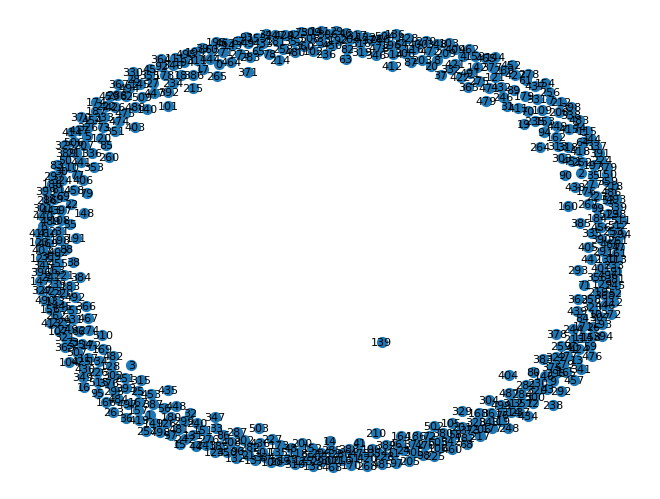

In [5]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes
for i, row in features_scaled_df.iterrows():
    # Here, i is the index in male_data, which corresponds to the node ID
    # row.to_dict() converts the row to a dictionary of feature:value pairs
    G.add_node(i, **row.to_dict())

# Now, G contains all your nodes with their attributes as scaled features

# If you want to visualize the graph, you might need additional tools like matplotlib
# Note: For large graphs, visualization might be complex and not very informative without filtering or layout adjustments
import matplotlib.pyplot as plt

# Simple graph drawing, this might not be very informative for large datasets
nx.draw(G, with_labels=True, node_size=50, font_size=8)
plt.show()


1.2200934863453157
0.5882788120114321
1.3028894217611668
1.0388821892846445
1.5214365909253376
1.3191040753074244
1.3385945866634206
0.7890684619226539
1.1130513198167924
0.694574327678904
0.7822774601031346
0.9175595073284734
1.6759771052343737
1.3340405776777438
1.5938180093214573
0.7620652171212731
2.2245396323010547
1.5673727450570956
0.6507246113097342
1.2275396765165079
2.0348818402424524
2.752384918013346
2.1185548654697968
1.1207059991464556
1.1859720419065944
1.7330141549101918
1.18444483274687
1.5030201828994159
1.3915510128307829
1.0881530373816015
1.8392019060488822
1.5657015014955047
1.2685585793244936
1.3289875345230515
1.2826567837231442
1.1004372325254905
1.2835381106942514
0.8986874160000041
1.3695421280907405
1.737690209269049
1.5316293852509189
1.8556849540328724
1.1286069366072544
2.0646539675112567
0.7248777542302022
2.0307611470497684
0.8129417030072692
1.4753558310951127
1.0688197880199704
0.9019561987936985
0.9485574853478371
1.5850512854585723
2.120750480938223

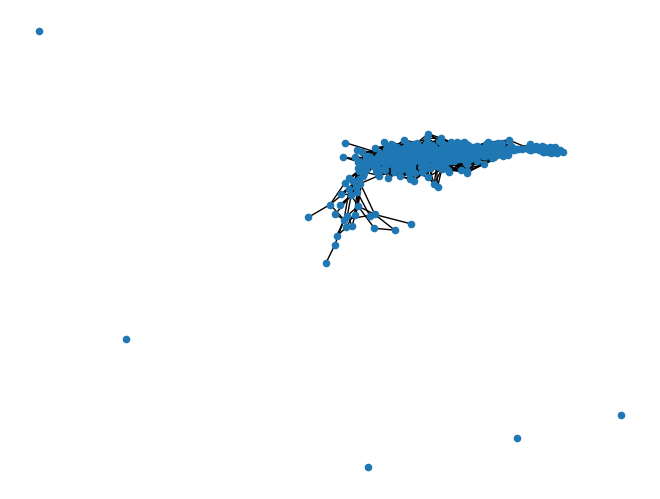

In [6]:
import networkx as nx
import math

# Create an empty graph
G = nx.Graph()
for i, row in features_scaled_df.iterrows():
    # Here, i is the index in male_data, which corresponds to the node ID
    # row.to_dict() converts the row to a dictionary of feature:value pairs
    G.add_node(i, **row.to_dict())

epsilon = 0.8  # Adjust epsilon as needed

# Define function for Euclidian distance
def euclidean_distance(array1, array2):
    '''
    Args:
        array1: NDArray of dimension 1
        array2: NDArray of dimension 1
    '''
    if (array1.ndim != 1 or array2.ndim != 1):
        print('Either array1 or array2 is not dimension 1')
        return -1
    # Calculate the sum of squared differences
    sum_squared_diff = np.sum((array1 - array2) ** 2)
    # Take the square root of the sum
    return np.sqrt(sum_squared_diff)

# Iterate over each pair of nodes to calculate distances and add edges if needed
for node1 in G.nodes:
    for node2 in G.nodes:
        if node1 < node2:  # Avoid repeating pairs and self-comparison
            attr1 = np.array(list(G.nodes[node1].values()))
            attr2 = np.array(list(G.nodes[node2].values()))
            distance = euclidean_distance(attr1, attr2)
            print(distance)
            distance_square = (distance / epsilon) ** 2
            similarity = math.exp(-distance_square)
            
            # Adjust the threshold according to the expected range of similarity
            if similarity > 0.5:  # Example threshold
                G.add_edge(node1, node2)

# Check the updated number of edges
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
nx.draw(G, node_size=20, font_size=8)
plt.show()


In [7]:
import numpy as np

# Randomly label 20% of the data rows as "Labeled"
features_scaled['Label'] = np.where(np.random.rand(len(features_scaled)) < 0.2, 'Labeled', 'Unlabeled')

# Extract the 'ALM' values for the "Labeled" rows into an array
ALM = features_scaled[male_data['Label'] == 'Labeled']['ALM'].to_numpy()

print(ALM)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph, each node representing a row in the DataFrame
# Also, assign the 'Label' value as a node attribute

# If you need to access and use the 'ALM' values of "Labeled" nodes later on,
# you can also add these as node attributes now
for index, row in male_data.iterrows():
    if row['Label'] == 'Labeled':
        G.nodes[index]['ALM'] = row['ALM']

# Iterate through all nodes and print those that are labeled
labeled_nodes = [node for node, attr in G.nodes(data=True) if attr.get('label') == 'Labeled']

print("Labeled Nodes:", labeled_nodes)

for i, row in features_scaled_df.iterrows():
    # Here, i is the index in male_data, which corresponds to the node ID
    # row.to_dict() converts the row to a dictionary of feature:value pairs
    G.add_node(i, **row.to_dict())


epsilon = 0.8  # Adjust epsilon as needed

# Iterate over each pair of nodes to calculate distances and add edges if needed
for node1 in G.nodes:
    for node2 in G.nodes:
        if node1 < node2:  # Avoid repeating pairs and self-comparison
            attr1 = np.array(list(G.nodes[node1].values()))
            attr2 = np.array(list(G.nodes[node2].values()))
            distance = euclidean_distance(attr1, attr2)
            print(distance)
            distance_square = (distance / epsilon) ** 2
            similarity = math.exp(-distance_square)
            
            # Adjust the threshold according to the expected range of similarity
            if similarity > 0.5:  # Example threshold
                G.add_edge(node1, node2)

# Check the updated number of edges
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
nx.draw(G, node_size=20, font_size=8)
plt.show()

KeyError: 11

In [ ]:
import random

def random_walk(G, start_node, num_steps):
    """
    Perform a random walk on the graph G starting from start_node.

    Parameters:
    - G: A NetworkX graph.
    - start_node: The node from which the random walk will start.
    - num_steps: The number of steps to walk.

    Returns:
    A list of nodes visited during the walk, including the start node.
    """
    current_node = start_node
    walk = [current_node]

    for _ in range(num_steps):
        neighbors = list(G.neighbors(current_node))
        if not neighbors:  # Check if the current node has no neighbors
            break  # End the walk if there are no more neighbors to visit
        current_node = random.choice(neighbors)  # Move to a random neighbor
        walk.append(current_node)

    return walk

# Example usage:
start_node = 0  # Replace with your chosen start node or select randomly
num_steps = 10  # Define the number of steps for the random walk
walk = random_walk(G, start_node, num_steps)
print("Visited nodes:", walk)


Visited nodes: [0, 34, 32, 24, 59, 158, 187, 77, 56, 24, 38]
